In [1]:
from pymongo import MongoClient
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
client = MongoClient('localhost', 27017)
politician_db = client['politician_db']

In [3]:
if 'tomprice' in politician_db.list_collection_names():
    print('yes')

yes


In [4]:
test_col = politician_db['tomprice']

In [5]:
test_col.find_one()

{'_id': '5979a65b7c459f246b61b3b0',
 'web_url': 'https://www.nytimes.com/2017/07/27/opinion/health-care-obamacare.html',
 'snippet': 'The Trump administration and a Republican Congress haven’t been able to repeal the Affordable Care Act, but they are doing their best to destroy it.',
 'blog': {},
 'source': 'The New York Times',
 'multimedia': [{'rank': 0,
   'subtype': 'xlarge',
   'caption': None,
   'credit': None,
   'type': 'image',
   'url': 'images/2017/07/27/opinion/27edsallWeb/27edsallWeb-articleLarge.jpg',
   'height': 403,
   'width': 600,
   'legacy': {'xlargewidth': 600,
    'xlarge': 'images/2017/07/27/opinion/27edsallWeb/27edsallWeb-articleLarge.jpg',
    'xlargeheight': 403},
   'subType': 'xlarge',
   'crop_name': None},
  {'rank': 0,
   'subtype': 'wide',
   'caption': None,
   'credit': None,
   'type': 'image',
   'url': 'images/2017/07/27/opinion/27edsallWeb/27edsallWeb-thumbWide.jpg',
   'height': 126,
   'width': 190,
   'legacy': {'wide': 'images/2017/07/27/opin

In [6]:
scandalcount = 0
for item in test_col.find():
    try: 
        if 'scandal' in item['full_text']:
            #print(item['full_text'])
            scandalcount += 1
    except:
        pass
scandalcount

6

In [7]:
len([item for item in politician_db['tomprice'].find()])

182

In [8]:
def get_sentiment(texts):
    analyzer = SentimentIntensityAnalyzer()
    count = 1
    ave_sent = 0
    for text in texts:
        vs = analyzer.polarity_scores(text)
        ave_sent += vs['compound']
        count += 1
    return ave_sent/count

In [9]:
texts = []
for item in politician_db['tomprice'].find():
    texts.append(item['full_text'])

In [10]:
len(texts)

182

In [11]:
get_sentiment(texts)

0.5562273224043716

In [12]:
def pub_date_to_datetime(s):
    s = s[:10]
    l = s.split('-')
    d = datetime.date(year=int(l[0]),month=int(l[1]),day=int(l[2]))
    return d

In [13]:
def plot_sentiment(name):
    tuplist = []
    analyzer = SentimentIntensityAnalyzer()
    for item in politician_db[name].find():
        try:
            sent = analyzer.polarity_scores(item['full_text'])['compound']
            tuplist.append((pub_date_to_datetime(item['pub_date']),sent))
        except:
            pass
    tuplist.sort(key=lambda x:x[0])
    dates = []
    aves = []
    running_tot = 0
    count = 0
    for item in tuplist:
        running_tot += item[1]
        count += 1
        aves.append(running_tot/count)
        dates.append(item[0])
    sns.lineplot(x=dates,y=aves, err_style=None)

/home/ubuntu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


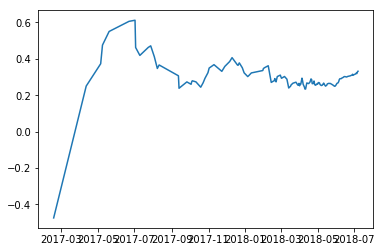

In [14]:
plot_sentiment('scottpruitt')

In [15]:
test_article = test_col.find_one()
test_article.keys()

dict_keys(['_id', 'web_url', 'snippet', 'blog', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'byline', 'type_of_material', 'word_count', 'score', 'uri', 'full_text'])

In [16]:
test_article['pub_date']

'2017-07-27T08:37:37+0000'

In [17]:
type(test_article['pub_date'])

str

In [18]:
pub_date_to_datetime(test_article['pub_date'])

datetime.date(2017, 7, 27)

In [19]:
def plot_frequency(name):
    months = []
    for item in politician_db[name].find():
        months.append(pub_date_to_datetime(item['pub_date']).year + pub_date_to_datetime(item['pub_date']).month/12)
    sns.distplot(months, bins=len(set(months)))

In [20]:
def plot_keywords(name):
    scandalcount = 0
    dates = []
    counts = []
    words_of_interest = ['scandal',
                    'resign',
                    'caught',
                    'sex',
                    'drugs',
                    'committed',
                    'corruption']
    for item in politician_db[name].find():
        try:
            for word in item['full_text'].split():
                if word in words_of_interest:
                    scandalcount += 1
            counts.append(scandalcount)
            dates.append(pub_date_to_datetime(item['pub_date']).year + pub_date_to_datetime(item['pub_date']).month/12)
        except:
            pass
    sns.lineplot(x=dates,y=counts,err_style=None)

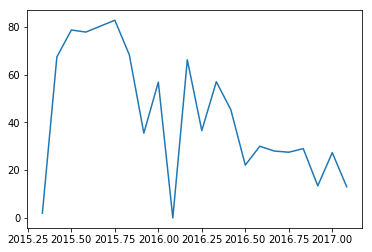

In [21]:
plot_keywords('lorettalynch')

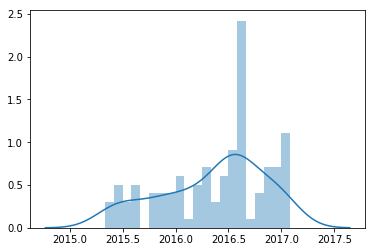

In [22]:
plot_frequency('lorettalynch')

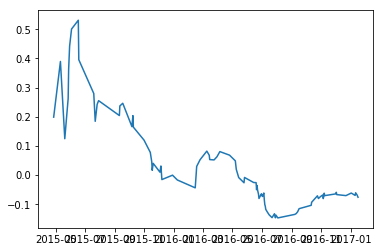

In [23]:
plot_sentiment('lorettalynch')

In [24]:
def gen_plots(name):
    plt.subplot(3,1,1)
    plot_frequency(name)
    #print()
    plt.subplot(3,1,2)
    plot_sentiment(name)
    #print()
    plt.subplot(3,1,3)
    plot_keywords(name)
    plt.show()

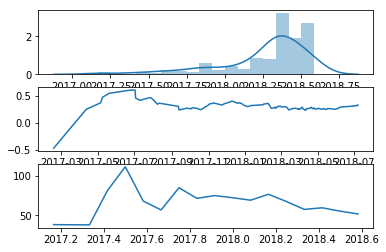

In [25]:
gen_plots('scottpruitt')